3. **Text Analysis** (Extra Model)
Objective: Build a text classification model to categorize text data.
Deliverables: - Python code implementing the chosen text classifier. - A short report explaining the text preprocessing, model performance, and insights gained from the analysis.

In [ ]:
import pandas as pd


# Reading data from CSV files, using the 'python' engine and error handling
train_data = pd.read_csv('/content/train.csv', engine='python', on_bad_lines='skip') # Using 'python' engine and skipping bad lines
test_data = pd.read_csv('/content/test.csv', engine='python', on_bad_lines='skip') # Using 'python' engine and skipping bad lines
submit_data = pd.read_csv('/content/submit.csv', engine='python', on_bad_lines='skip') # Using 'python' engine and skipping bad lines

# Quick look at the data
print(train_data.head())
print(test_data.head())
print(submit_data.head())

# Merging data or working with the relevant columns
# Assuming there is a "news" column for the news and a "label" column for the classification
X_train = train_data['title']

y_train = train_data['label']

X_test = test_data['title']

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
      id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian war

In [ ]:
# 1. Display the first 5 rows of the data
import pandas as pd



print("First 5 rows of the training data:")
print(train_data.head())

print("\nFirst 5 rows of the test data:")
print(test_data.head())

# 2. Information about columns, data types, and non-null values
print("\nInformation about the training data:")
print(train_data.info())

print("\nInformation about the test data:")
print(test_data.info())

# 3. Descriptive statistics for numerical data
print("\nDescriptive statistics for numerical columns in the training data:")
print(train_data.describe())

print("\nDescriptive statistics for numerical columns in the test data:")
print(test_data.describe())

# 4. Distribution of values in the target column (label)
if 'label' in train_data.columns:
    print("\nDistribution of values in the 'label' column in the training data:")
    print(train_data['label'].value_counts())
# 1. Display the first 5 rows of the data
import pandas as pd

# Assuming your data is in a CSV file named 'train.csv'


print("First 5 rows of the training data:")
print(train_data.head())

print("\nFirst 5 rows of the test data:")
print(test_data.head())

# 2. Information about columns, data types, and non-null values
print("\nInformation about the training data:")
print(train_data.info())

print("\nInformation about the test data:")
print(test_data.info())

# 3. Descriptive statistics for numerical data
print("\nDescriptive statistics for numerical columns in the training data:")
print(train_data.describe())

print("\nDescriptive statistics for numerical columns in the test data:")
print(test_data.describe())

# 4. Distribution of values in the target column (label)
if 'label' in train_data.columns:
    print("\nDistribution of values in the 'label' column in the training data:")
    print(train_data['label'].value_counts())

# 5. Check for missing values (Null)
print("\nNumber of missing values in the training data")
print(train_data.isnull().sum())
print("\nNumber of missing values in the test data")
print(test_data.isnull().sum())

First 5 rows of the training data:
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  

First 5 rows of the test data:
      id                                              title  \
0  20800  Specter

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
#from sklearn.metrics import accuracy_score # This was not used so I removed it

# Building a pipeline for text transformation and classification
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression())
])

# Training the model using the training data
# Filling NaN values in X_train with an empty string before fitting the model
# Convert y_train to numeric, coerce errors to NaN, then fill NaN with a suitable value (e.g., -1)
y_train = pd.to_numeric(y_train, errors='coerce').fillna(-1).astype(int)
model.fit(X_train.fillna(''), y_train) # Changed here

# Predicting labels using the test data
# Filling NaN values in X_test with an empty string before prediction
y_pred = model.predict(X_test.fillna('')) # Changed here

# If the actual labels for the test data are available, we can check accuracy with this
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Printing the final predictions
print(y_pred)

# Saving the final predictions to the submit.csv file
submit_data = submit_data.iloc[:len(y_pred)]
submit_data['label'] = y_pred

submit_data.to_csv('/content/submit.csv', index=False)

[0 1 1 ... 1 0 0]


<ipython-input-3-cf020d4dccf0>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit_data['label'] = y_pred


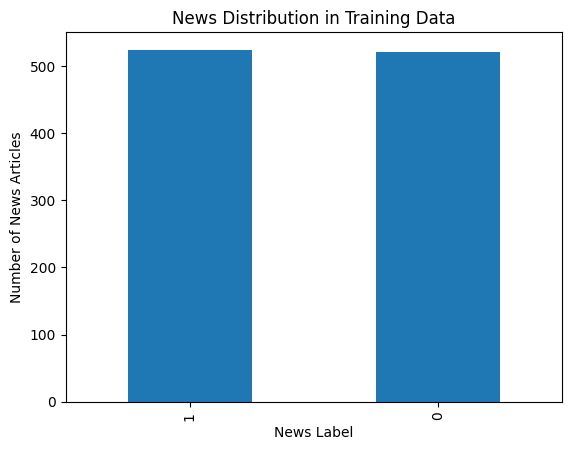

In [ ]:
import matplotlib.pyplot as plt

# Distribution of labels in the data
train_data['label'].value_counts().plot(kind='bar')
plt.title('News Distribution in Training Data')
plt.xlabel('News Label')
plt.ylabel('Number of News Articles')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy_score # This was not used so I removed it

# Building a pipeline for text transformation and classification
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Example: unigrams and bigrams
    'classifier__C': [0.1, 1, 10],  # Example: regularization strength
}

# Training the model using the training data
# Filling NaN values in X_train with an empty string before fitting the model
# Replacing NaN values with empty strings before fitting GridSearchCV
X_train = X_train.fillna('')  # Fill NaN values in X_train
grid_search = GridSearchCV(model, param_grid, cv=5) # Now using the defined param_grid
grid_search.fit(X_train, y_train) # Changed here

# Displaying the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Predicting using the optimized model
# Filling NaN values in X_test with an empty string before prediction
# Replacing NaN values with empty strings before predicting using the optimized model
X_test = X_test.fillna('') # Fill NaN values in X_test
y_pred_optimized = grid_search.predict(X_test)

Best Parameters: {'classifier__C': 10, 'tfidf__ngram_range': (1, 1)}


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer # Importing TfidfVectorizer

# Assuming X_train is your training data (text data)
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the training data to create TF-IDF features
X_train_tfidf = vectorizer.fit_transform(X_train)  # Creating X_train_tfidf

# Transform the test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test) # Creating X_test_tfidf


# Build a Naive Bayes model
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

# Predict labels for test data
y_pred = model.predict(X_test_tfidf)

# Show expected results
print("Forecast:", y_pred)

Forecast: [0 1 0 ... 0 0 0]


In [ ]:
# Add predictions to submit.csv
submit_data['label'] = y_pred

# Save results to submit.csv file
submit_data.to_csv('/content/submit.csv', index=False)

print("Results saved to submit.csv")

Results saved to submit.csv


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Build a Logistic Regression model
log_model = LogisticRegression()

# Optimize parameters using GridSearchCV
param_grid = {'C': [0.1, 1, 10]} # Experiment with different parameters
grid_search = GridSearchCV(log_model, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Best parameter found
print("Best parameter:", grid_search.best_params_)

# Predict using the improved model
y_pred_log = grid_search.predict(X_test_tfidf)

# Save the new results in submit.csv
submit_data['label'] = y_pred_log
submit_data.to_csv('submit_logistic.csv', index=False)

print("Results saved using Logistic Regression in submit_logistic.csv")

Best parameter: {'C': 10}
Results saved using Logistic Regression in submit_logistic.csv


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_tfidf, y_train)

# Predict the labels for the test data
y_pred_rf = rf_model.predict(X_test_tfidf)

# Save the predictions in the submit.csv file
submit_data['label'] = y_pred_rf
submit_data.to_csv('submit_random_forest.csv', index=False)

print("Results have been saved using Random Forest in submit_random_forest.csv")


Results have been saved using Random Forest in submit_random_forest.csv


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels on the training data (as an example)
y_train_pred = model.predict(X_train_tfidf)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("Classification Report:")
print(classification_report(y_train, y_train_pred))


Confusion Matrix:
[[518   3]
 [  2 522]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       521
           1       0.99      1.00      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the Random Forest model
scores = cross_val_score(RandomForestClassifier(n_estimators=100), X_train_tfidf, y_train, cv=5)

print("Model performance using cross-validation:", scores)
print("Average performance:", scores.mean())


Model performance using cross-validation: [0.94258373 0.92822967 0.93301435 0.93779904 0.91866029]
Average performance: 0.9320574162679426


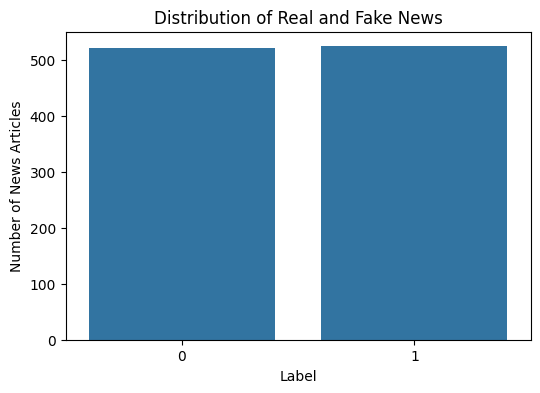

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of labels in the training data
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Real and Fake News')
plt.xlabel('Label')
plt.ylabel('Number of News Articles')
plt.show()


<ipython-input-15-21238a9fd403>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='idf', y='word', data=tfidf_df, palette='viridis')


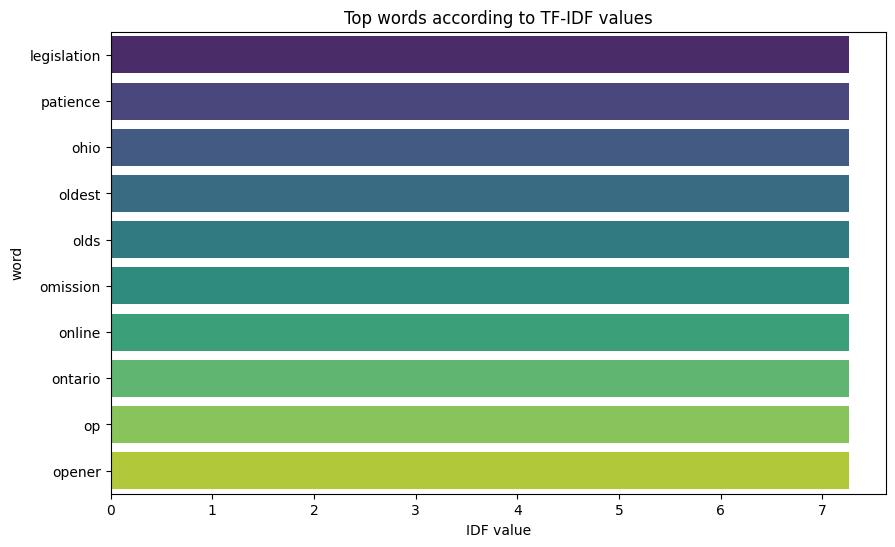

In [ ]:

# Extract words and values ​​from TF-IDF
tfidf_values = vectorizer.idf_
tfidf_features = vectorizer.get_feature_names_out()

# Convert values ​​to DataFrame
tfidf_df = pd.DataFrame({'word': tfidf_features, 'idf': tfidf_values})

# Display top words by TF-IDF
tfidf_df = tfidf_df.sort_values(by='idf', ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='idf', y='word', data=tfidf_df, palette='viridis')
plt.title('Top words according to TF-IDF values')
plt.xlabel('IDF value')
plt.ylabel('word')
plt.show()


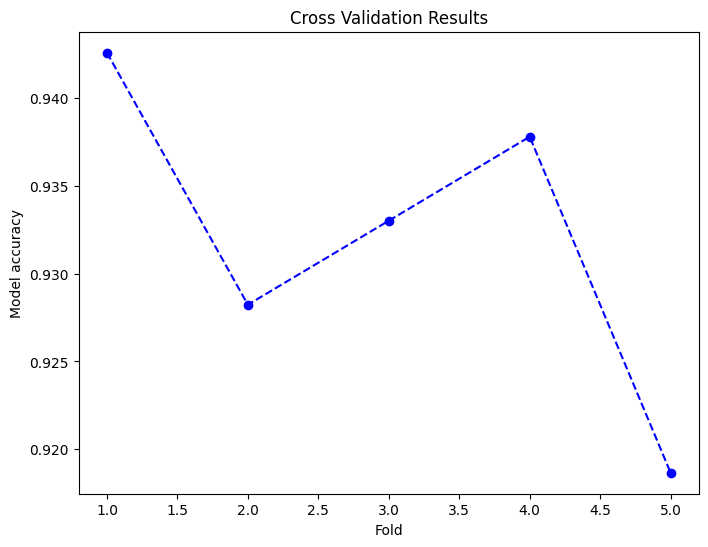

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Calculate cross-validation results
cross_val_results = cross_val_score(RandomForestClassifier(n_estimators=100), X_train_tfidf, y_train, cv=5)

# Visualization of results
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), cross_val_results, marker='o', linestyle='--', color='b')
plt.title('Cross Validation Results')
plt.xlabel('Fold')
plt.ylabel('Model accuracy')
plt.show()